## Task 3 : Exploratory Data Analysis - Retail
# GRIP @ The Sparks Foundation
# Author : DEVANSH SHRIVASTAVA

# Problem Statement
#### Perform ‘Exploratory Data Analysis’ on dataset ‘Sample_Superstore’. 
#### As a business manager, try to find out the weak areas where you can work to make more profit. 

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1 - Reading and Understanding Data

In [178]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [179]:
df.shape # There are 9994 observations and 13 columns in the dataset

(9994, 13)

In [180]:
df.info() # No null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Checking for null values

In [181]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Five point summary of numerical features

In [182]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [183]:
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


In [184]:
# Converting postal code to object datatype

df['Postal Code'] = df['Postal Code'].astype("object")

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


# Number of unique values in each column

In [186]:
for i in df.columns:
    print('\nColumn:',i)
    print('\nNumber of categories:',df[i].value_counts().count())
    print(df[i].value_counts())


Column: Ship Mode

Number of categories: 4
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Column: Segment

Number of categories: 3
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Column: Country

Number of categories: 1
United States    9994
Name: Country, dtype: int64

Column: City

Number of categories: 531
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Ormond Beach       1
Abilene            1
San Mateo          1
Pico Rivera        1
Hagerstown         1
Name: City, Length: 531, dtype: int64

Column: State

Number of categories: 49
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255


In [187]:
num_col=df.select_dtypes(np.number).columns
print('Numerical Columns Are :',num_col)

Numerical Columns Are : Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [188]:
cat_col=df.select_dtypes('object').columns
print('Categorical Columns Are :',cat_col)

Categorical Columns Are : Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category'],
      dtype='object')


# Step 2 - Visualizing the input data

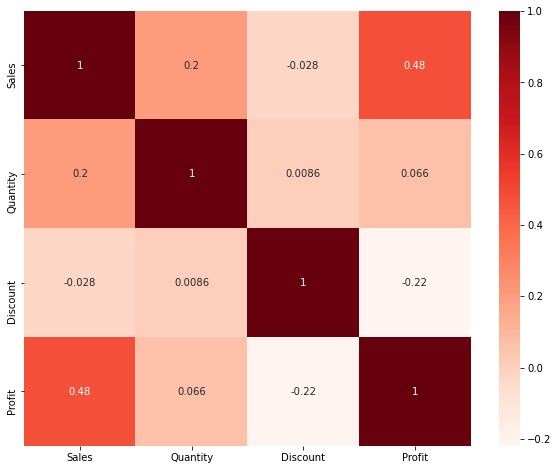

In [189]:
cor=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap = 'Reds')
plt.show()

# Inference
Discount impacts the Sales and Profit

Discount and Profit are negatively correlated (-0.22)

Discount and Sales are positively correlated (0.48)

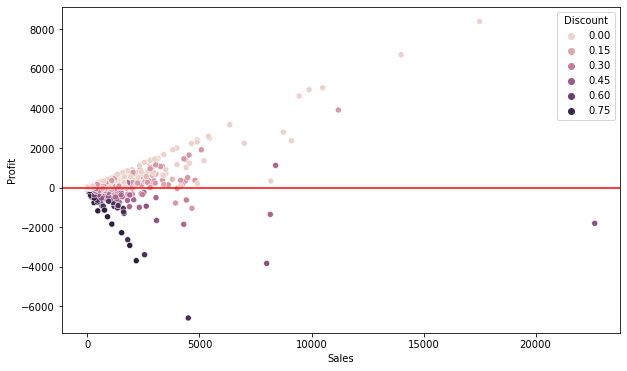

In [190]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Sales'],df['Profit'],hue=df['Discount'])
plt.axhline(0,0,color='r')
plt.show()

# Inference
There is weak positive correlation between Sales and Profit.

There is high negative correlation between Discount and Profit

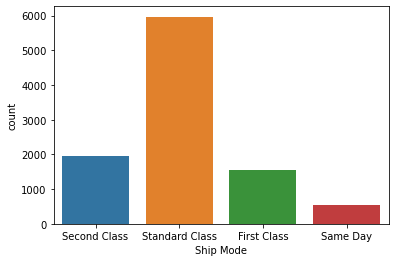

In [191]:
sns.countplot(x=df['Ship Mode'])
plt.show()

In [192]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

# Inference
Standard Class mode have highest shipment and same day mode have the lowest shipment

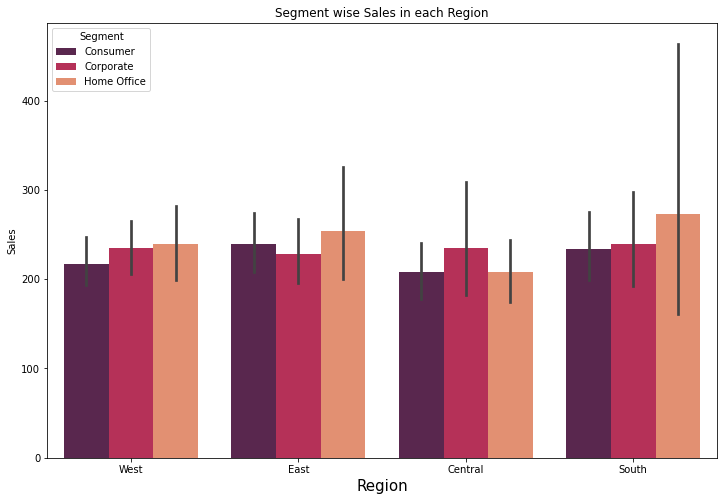

In [193]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

# Inference
Segment wise sales are almost same in every region

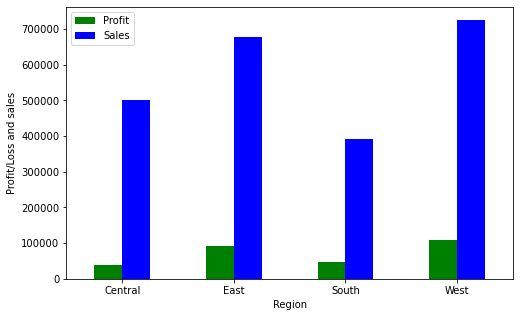

In [194]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['g','b'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.xticks(rotation=0)
plt.show()

# Inference
Profit and sales are maximum in west region and minimum in south region

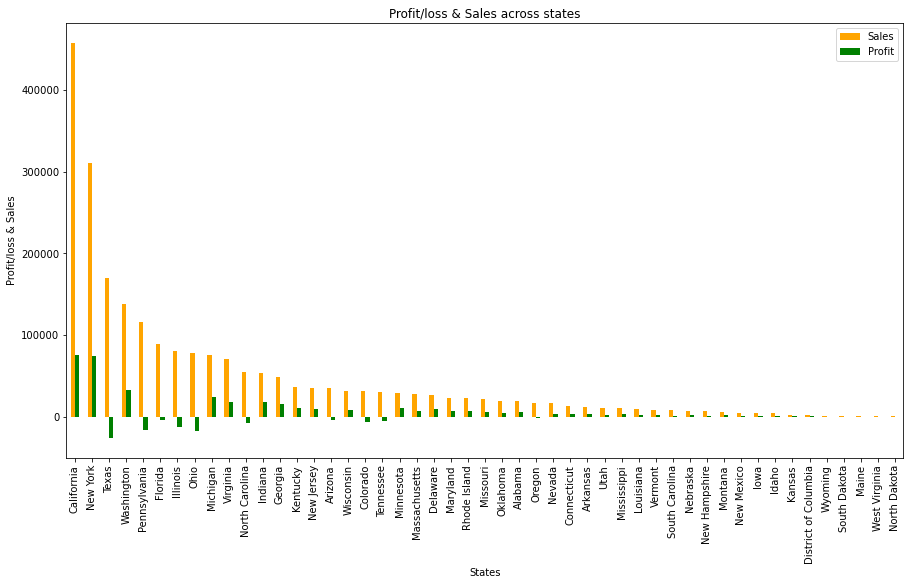

In [195]:
x= df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
x[:].plot.bar(color=['orange','green'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

# Inference
High profit is for california, new york

loss is for texas, pennsylvania, Ohio

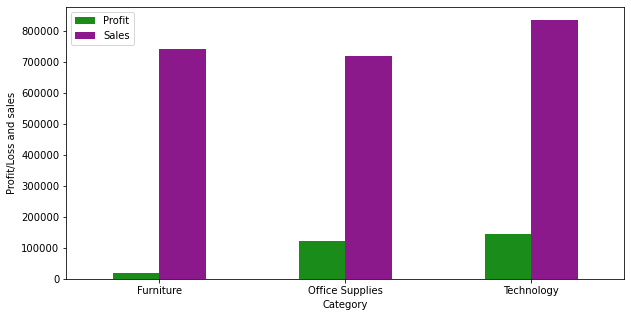

In [196]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['g','purple'],alpha=0.9,figsize=(10,5))
plt.ylabel('Profit/Loss and sales')
plt.xticks(rotation=0)
plt.show()

# Inference
Technology and Office Supplies have high profit.
Furniture have less profit

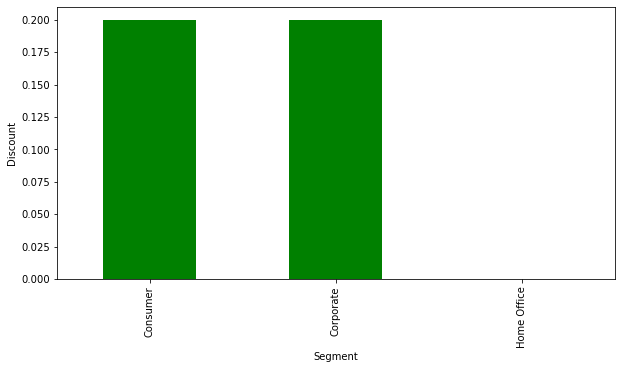

In [197]:
plt.figure(figsize=(10,5))
df.groupby('Segment')['Discount'].median().plot(kind='bar',color='g')
plt.ylabel('Discount')
plt.show()

# Inference
The home office people tends to buy more with no discounts comparing with other segment people.

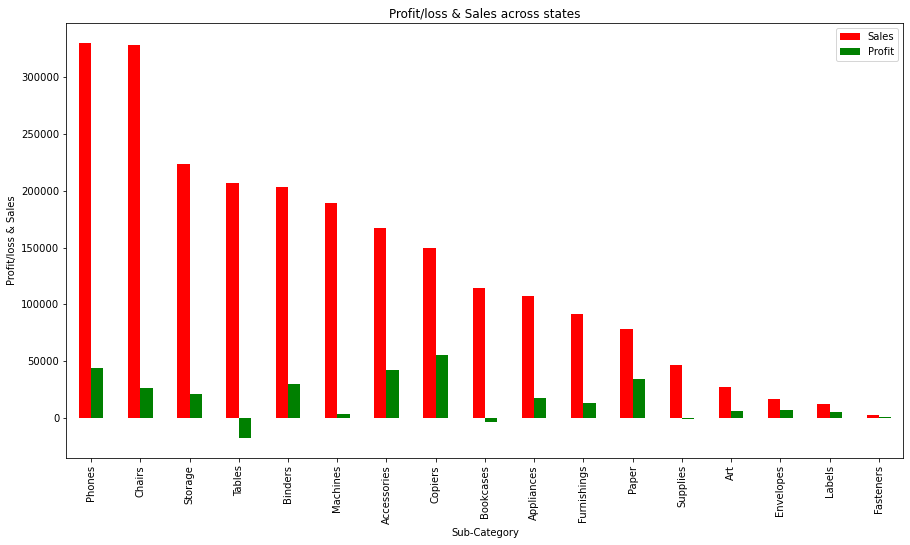

In [198]:
x = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
x[:].plot.bar(color=['red','g'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

# Inference
Phones sub-category have high sales.

Chairs have high sales but less profit compared to Phones

Tables and Bookmarks sub-categories facing huge loss

# Thank You